In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c

#Make np arrays print in scientific notation:
np.set_printoptions(formatter={'float': lambda x: format(x, '9.4E')})
#Make numbers display in exponential form:
%precision %e

u'%e'

In [2]:
indx, halomass, haloradius, vmax, xpos, y, z, v_x, v_y, v_z = np.loadtxt (
    "halo_bolshoi_z0.00_D360.dat", unpack=True)
#halo mass per 250/0.7 cubic megaparsecs

In [3]:
#Output the arrays in a columnated format so I can see what I'm working with
np.savetxt("columnated.txt",zip(indx,halomass,haloradius,vmax,xpos, y, z, v_x,
                         v_y, v_z), fmt='%30.8f')

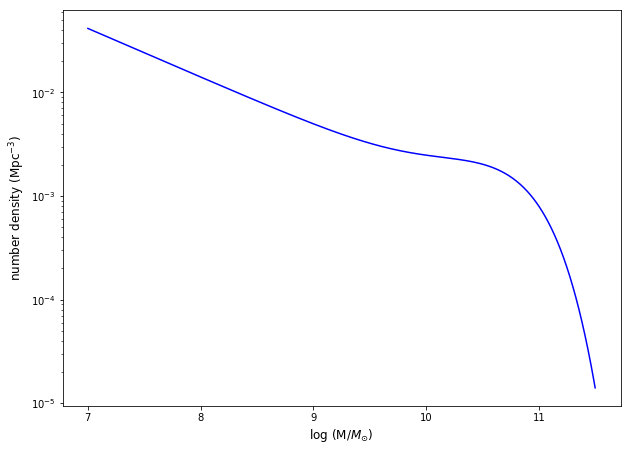

In [4]:
#CALCULATING AND PLOTTING THE GALAXY MASS DENSITY FUNCTION

m_ast = 10.**10.66 #M* in solar mass
phi_ast1 = 3.96*10.**-3. #Mpc^-3
alpha1 = -0.35
phi_ast2 = 0.79*10.**-3. #Mpc^-3
alpha2 = -1.47

logmratio = np.linspace(7,11.5,1000) #Log of Galaxy mass to solar mass
m = 10**logmratio #galaxy mass in solar mass
phi = np.exp(-m/m_ast)*(phi_ast1*(m/m_ast)**alpha1+phi_ast2*(m/m_ast)
                        **alpha2)/m_ast*m

fig=plt.figure(figsize=(10,16))

galaxymassplt=fig.add_subplot(2,1,1)

galaxymassplt.semilogy(logmratio,phi,'b-')
galaxymassplt.set_ylabel('number density (Mpc$^{-3}$)',fontsize=12)
galaxymassplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)

plt.show()

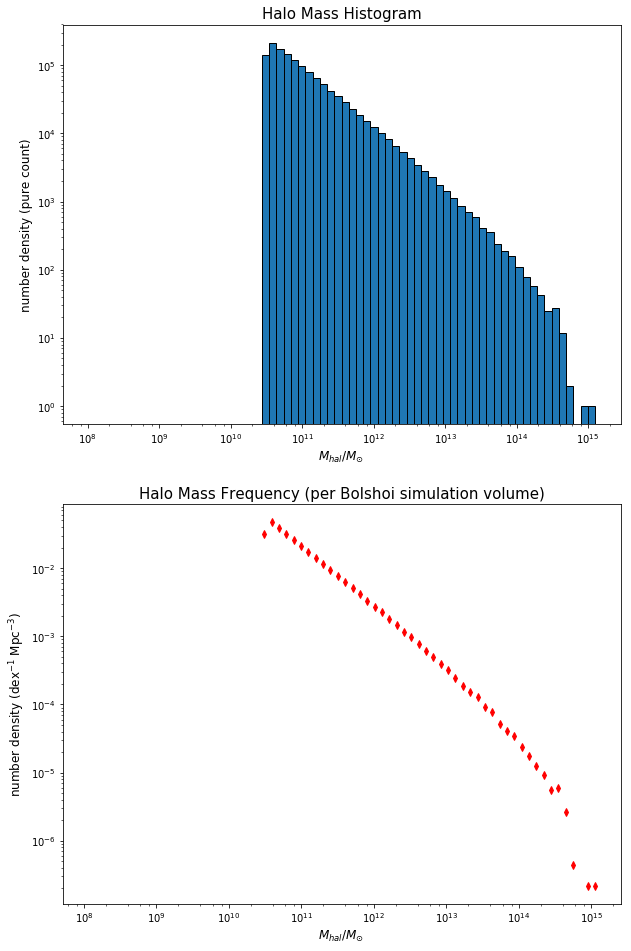

In [9]:
#BINNING AND PLOTTING HALO MASS DENSITIES

binsize=0.1 #Bin size is 0.1 dex
#Creating the bins, which span from 8 dex to 15 dex:
bins=np.logspace(8,15.1,(15.1-8.)/binsize+1) #non-exponential bins (Add 1 to the num arg because the elements include the starting point.)
logbins=np.log10(bins) #bins in dex units

fig=plt.figure(figsize=(10,25))

halomassplot=fig.add_subplot(3,1,1)
halofreq, binsout, patches = halomassplot.hist(halomass,bins=bins,edgecolor='k')
halomassplot.set_xscale('log')
halomassplot.set_yscale('log')
halomassplot.set_ylabel('number density (pure count)',fontsize=12)
halomassplot.set_xlabel('$M_{hal}/M_{\odot}$',fontsize=12)
halomassplot.set_title('Halo Mass Histogram',fontsize=15)

halofreq=halofreq/(250./0.7)**3./binsize #frequency per cubic Megaparsec (diving by bin size to make the function independent of binsize, dividing by 0.7 is dividing by h)
midbins = (binsout[1:]+binsout[:-1])/2.
logmidbins=np.log10(midbins)

dotplot=fig.add_subplot(3,1,2)
dotplot.plot(midbins,halofreq,'rd',markersize=5)
dotplot.set_xscale('log')
dotplot.set_yscale('log')
dotplot.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
dotplot.set_xlabel('$M_{hal}/M_{\odot}$',fontsize=12)
dotplot.set_title('Halo Mass Frequency (per Bolshoi simulation volume)',fontsize=15)

plt.show()

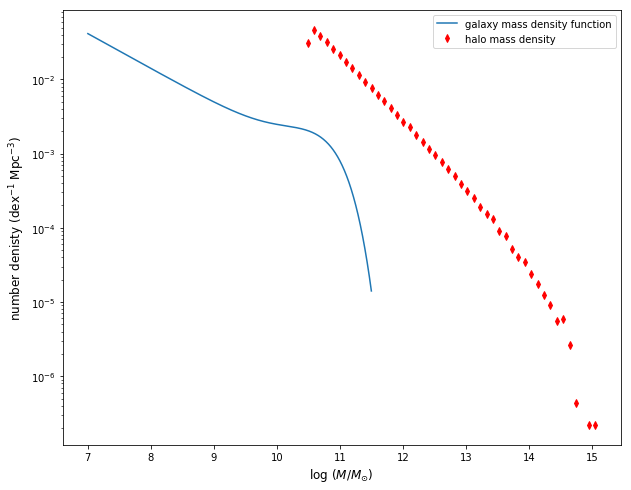

In [10]:
#PLOT THE GALAXY AND HALO MASS DENSITY FUNCTIONS ON THE SAME PLOT WITHOUT ANY AXES MANIPUATIONS

plt.figure(figsize=(10,8))

plt.semilogy(logmratio,phi,label='galaxy mass density function') #Plot the galaxy mass function
plt.xlabel('log ($M/M_{\odot}$)',fontsize=12)
plt.ylabel('number denisty (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
plt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='halo mass density')
plt.legend()
plt.show()

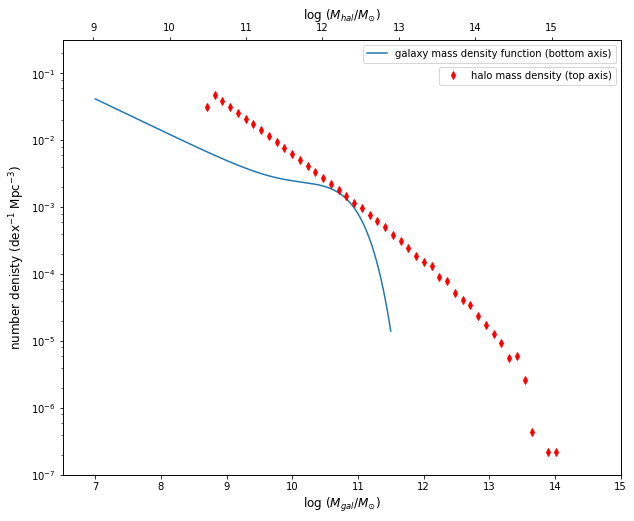

In [11]:
#PLOT THE HALO AND GALAXY MASS DENSITY FUNCTION ON THE SAME PLOT, MOVING THE HALO MASS FUNCTION TO THE LEFT

plt.figure(figsize=(10,8))

plt.semilogy(logmratio,phi,label='galaxy mass density function (bottom axis)') #Plot the galaxy mass function
plt.xlabel('log ($M_{gal}/M_{\odot}$)',fontsize=12)
plt.ylabel('number denisty (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
plt.xlim(6.5,15)
plt.legend()

plt.twiny() #make a second x axis
plt.ylim(10.**-7.,10.**-0.5)

plt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='halo mass density (top axis)')
plt.xlim(8.6,15.9) #setting xlim for halo function
plt.xlabel('log ($M_{hal}/M_{\odot}$)',fontsize=12)

plt.legend(bbox_to_anchor=[1,0.95])

plt.show()

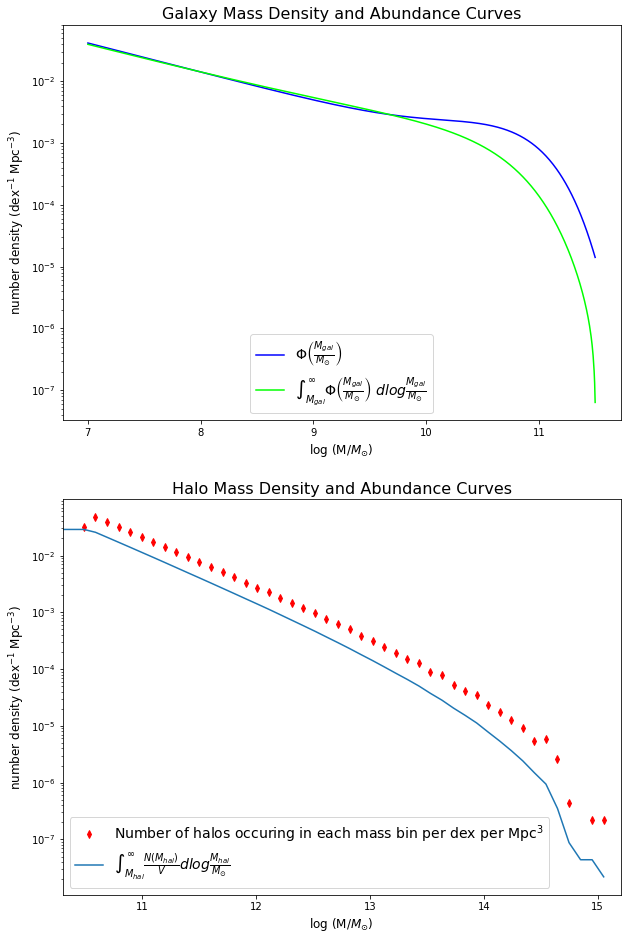

Okay: halofrequency integral from 0 to inf matches halomass array size.


In [12]:
#CREATE THE ABUNDANCE CURVE FOR GALAXY MASS
revphi = np.flip(phi,0) #reverse galaxy number density array so I can calculate the area as the integral from M_gal to inf
revlogmratio = np.flip(logmratio,0) #reverse the logmratio array so I can plot the area later in the code
dx_gal = (logmratio.max()-logmratio.min())/(len(logmratio))
sumdy_gal = np.array([revphi[:i].sum() for i in np.arange(1,len(phi)+1,1)])
galaxyarea=sumdy_gal*dx_gal

#Plotting galaxy
fig=plt.figure(figsize=(10,16))

galaxymassplt=fig.add_subplot(2,1,1)
galaxymassplt.semilogy(logmratio,phi,'b-', #Replot the galaxy mass density function created earlier
                      label='$\\Phi \\left(\\frac{M_{gal}}{M_{\\odot}} \\right)$')
galaxymassplt.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
galaxymassplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)
galaxymassplt.semilogy(revlogmratio,galaxyarea,color=(0,1,0), #Plot the area under the galaxy mass density function according to the integral from M_gal to inf
                       label='$\\int_{M_{gal}}^{\\infty}\\Phi \\left(\\frac{M_{gal}}{M_{\\odot}} \\right)\;'
                       'dlog\\frac{M_{gal}}{M_{\\odot}}$')
galaxymassplt.legend(fontsize=14,loc='lower center')
galaxymassplt.set_title('Galaxy Mass Density and Abundance Curves',fontsize=16)
                        
#CREATE THE ABUNDANCE CURVE FOR HALO MASS
revhalofreq = np.flip(halofreq,0) #reverse the halo frequency array so I can calculate the area as the integral from M_hal to infinity
revlogmidbins = np.flip(logmidbins,0) #reverse the logmidbins array so I can plot the area later in the code
sumdy_hal=np.array([revhalofreq[:i].sum() for i in np.arange(1,len(revhalofreq)+1,1)]) #Create an array of the sum of all frequencies/Mpc^3 from M_hal to infinity, using revhalofreq, which starts from the most massive halos and progresses to the least massive halos
haloarea=sumdy_hal*binsize #midpoint approximation of the the curve of integral of all HO frequencies/Mpc^3 from M_hal to infinity

#Plotting halo
haloabundanceplt=fig.add_subplot(2,1,2)
haloabundanceplt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='Number of halos occuring in each mass bin per dex per Mpc$^{3}$')
haloabundanceplt.semilogy(revlogmidbins,haloarea,label='$\\int_{M_{hal}}^{\infty}\\frac{N(M_{hal})}{V}dlog\\frac{M_{hal}}{M_{\odot}}$')
haloabundanceplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)
haloabundanceplt.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
haloabundanceplt.legend(fontsize=14)
haloabundanceplt.set_title('Halo Mass Density and Abundance Curves',fontsize=16)
haloabundanceplt.set_xlim(10.3,15.2)

plt.savefig('Abundance Curves.png')
plt.show()

#Perform a test:
if halomass.size/(250./0.7)**3.==np.max(haloarea): #Testing to make sure that the number of elements in the halomass array matches the integral from 0 to infinity.
    print"Okay: halofrequency integral from 0 to inf matches halomass array size."
else:
    print"Error: halofrequency integral from 0 to inf does not match halo array size."

In [14]:
print haloarea
print galaxyarea

[2.1952E-08 4.3904E-08 4.3904E-08 8.7808E-08 3.5123E-07 9.4394E-07
 1.4927E-06 2.4147E-06 3.6660E-06 5.4002E-06 7.7710E-06 1.1261E-05
 1.5344E-05 2.0547E-05 2.8340E-05 3.7384E-05 5.0380E-05 6.5724E-05
 8.4581E-05 1.0943E-04 1.4093E-04 1.7957E-04 2.2997E-04 2.9154E-04
 3.6759E-04 4.6422E-04 5.8103E-04 7.2602E-04 9.0675E-04 1.1321E-03
 1.4027E-03 1.7334E-03 2.1458E-03 2.6511E-03 3.2745E-03 4.0386E-03
 4.9677E-03 6.1235E-03 7.5433E-03 9.2773E-03 1.1388E-02 1.3979E-02
 1.7131E-02 2.0974E-02 2.5662E-02 2.8798E-02 2.8798E-02 2.8798E-02
 2.8798E-02 2.8798E-02 2.8798E-02 2.8798E-02 2.8798E-02 2.8798E-02
 2.8798E-02 2.8798E-02 2.8798E-02 2.8798E-02 2.8798E-02 2.8798E-02
 2.8798E-02 2.8798E-02 2.8798E-02 2.8798E-02 2.8798E-02 2.8798E-02
 2.8798E-02 2.8798E-02 2.8798E-02 2.8798E-02]
[6.3408E-08 1.3107E-07 2.0321E-07 2.8008E-07 3.6193E-07 4.4901E-07
 5.4160E-07 6.3997E-07 7.4442E-07 8.5525E-07 9.7276E-07 1.0973E-06
 1.2291E-06 1.3686E-06 1.5162E-06 1.6721E-06 1.8369E-06 2.0107E-06
 2.1941E-06 2.38